In [1]:
#import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# importing regex module
import re

#sns.set_style(style="whitegrid")
#sns.set_theme(style="whitegrid")
filename ='NFHBiomassConvCompare.csv' 
df =pd.read_csv(filename, dtype= int)
df.columns =df.keys()
print(df.head())
# removing null values to avoid errors 
df.dropna(inplace = True) 
#df_val= df.values*900  
# percentile list
perc =[.10, .25, .50, .75, .90]
  
# list of dtypes to include
include =['object', 'int', 'int']
  
# calling describe method
desc = df.describe(percentiles = perc, include = include)

print(desc)

   iCell  LANDIS_BQ  LANDIS_B  Lantrendr01  WoodsHole 
0      0    3579300   3579300      3285000     2250000
1      1    3579300   3579300      6930000     7065000
2      2    3019500   3019500      5310000     5400000
3      3    3019500   3019500      5130000     4950000
4      4    3019500   3019500      5085000     3735000
               iCell     LANDIS_BQ      LANDIS_B   Lantrendr01    WoodsHole 
count  920577.000000  9.205770e+05  9.205770e+05  9.205770e+05  9.205770e+05
mean   460288.000000  3.134540e+06  3.133985e+06  2.908502e+06  3.013660e+06
std    265747.833716  1.537445e+06  1.535717e+06  1.440536e+06  1.636143e+06
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
10%     92057.600000  8.460000e+05  8.460000e+05  1.080000e+06  1.440000e+06
25%    230144.000000  2.775600e+06  2.775600e+06  1.845000e+06  1.890000e+06
50%    460288.000000  3.283200e+06  3.283200e+06  2.790000e+06  2.835000e+06
75%    690432.000000  3.783600e+06  3.783600e+06  3.91

In [2]:
data_array=df.values[:, 1:5]
data_array.shape

(920577, 4)

In [3]:
df.median()

iCell           460288.0
LANDIS_BQ      3283200.0
LANDIS_B       3283200.0
Lantrendr01    2790000.0
WoodsHole      2835000.0
dtype: float64

In [4]:
lb = data_array[:,0];
lbq = data_array[:,1];
ltr = data_array[:,2];
wh = data_array[:,3];

In [5]:
row, column = 1239, 743

In [6]:
#g is for gridded row, column
lbg = np.reshape(lb,(row,column), order='C');
lbqg = np.reshape(lbq,(row,column), order='C');
ltrg = np.reshape(ltr,(row,column), order='C');
whg = np.reshape(wh,(row,column), order='C');

In [7]:
import seaborn as sns

In [8]:
#fig, ax = plt.subplots(2,2,figsize=(8,8))
#ax[0,0].plot(sns.heatmap(lbg, cmap="YlGnBu"))
#ax[0,0].set_title('LANDIS_B')
#ax[0,1].plot(sns.heatmap(lbqg, cmap="YlGnBu"))
#ax[0,1].set_title('LANDIS_BQ')

#ax[1,0].plot(sns.heatmap(ltrg, cmap="YlGnBu"))
##ax[1,1].plot(sns.heatmap(whg, cmap="YlGnBu"))
#ax[1,1].set_title('WH')

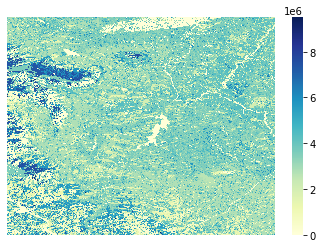

In [9]:
ax = sns.heatmap(lbg, cmap="YlGnBu", xticklabels=False, yticklabels=False)

In [11]:
#ax = sns.heatmap(lbg_s, cmap="YlGnBu", xticklabels=False, yticklabels=False)

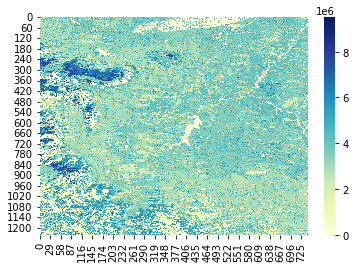

In [12]:
ax = sns.heatmap(lbg, cmap="YlGnBu")

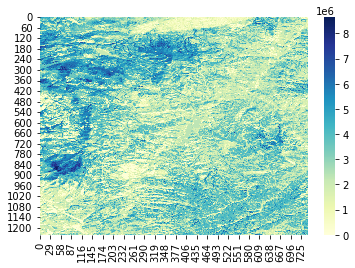

In [13]:
ax = sns.heatmap(ltrg, cmap="YlGnBu")

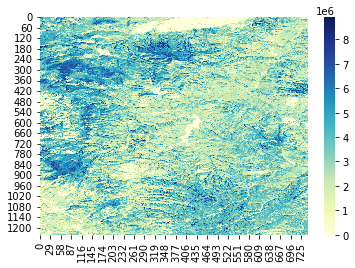

In [14]:
ax = sns.heatmap(whg, cmap="YlGnBu")

In [15]:
#scaled _s for each biomass model 
lbg_s = lbg/10**6;
lbqg_s =lbqg/10**6;
whg_s = whg/10**6; 
ltrg_s = ltrg/10**6;

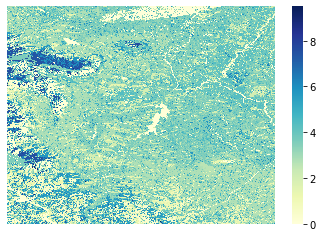

In [16]:
ax = sns.heatmap(lbg_s, cmap="YlGnBu", xticklabels=False, yticklabels=False)

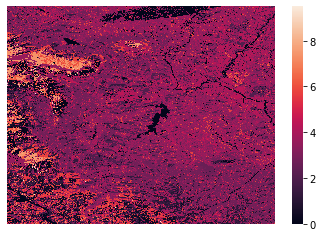

In [17]:
sns.color_palette("cubehelix", as_cmap=True)
#sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(lbg_s, xticklabels=False, yticklabels=False)

In [18]:
diff_lbgs_lbqgs = (lbqg_s - lbg_s)/lbg_s;
pd_lbgs_lbqgs = diff_lbgs_lbqgs *100;
diff_ltrgs_lbqgs = (lbqg_s - ltrg_s)/ltrg_s;
pd_ltrgs_lbqgs = diff_ltrgs_lbqgs *100;
diff_whgs_lbqgs = (lbqg_s - whg_s)/whg_s;
pd_whgs_lbqgs = diff_whgs_lbqgs *100;

C:\Users\kvenable\AppData\Local\Temp/ipykernel_1064/1311622411.py:1: RuntimeWarning: invalid value encountered in true_divide
  diff_lbgs_lbqgs = (lbqg_s - lbg_s)/lbg_s;
C:\Users\kvenable\AppData\Local\Temp/ipykernel_1064/1311622411.py:3: RuntimeWarning: divide by zero encountered in true_divide
  diff_ltrgs_lbqgs = (lbqg_s - ltrg_s)/ltrg_s;
C:\Users\kvenable\AppData\Local\Temp/ipykernel_1064/1311622411.py:3: RuntimeWarning: invalid value encountered in true_divide
  diff_ltrgs_lbqgs = (lbqg_s - ltrg_s)/ltrg_s;
C:\Users\kvenable\AppData\Local\Temp/ipykernel_1064/1311622411.py:5: RuntimeWarning: divide by zero encountered in true_divide
  diff_whgs_lbqgs = (lbqg_s - whg_s)/whg_s;
C:\Users\kvenable\AppData\Local\Temp/ipykernel_1064/1311622411.py:5: RuntimeWarning: invalid value encountered in true_divide
  diff_whgs_lbqgs = (lbqg_s - whg_s)/whg_s;


In [19]:
print(np.unique(diff_lbgs_lbqgs))#dropna values then do performance

[-0.21086359  0.                 nan ...         nan         nan
         nan]


In [22]:
np.unique(pd_ltrgs_lbqgs)

array([-100.        ,  -99.00578035,  -98.9704142 , ...,           nan,
                 nan,           nan])

In [29]:
print(pd_ltrgs_lbqgs[0][0:11])

[  8.95890411 -48.35064935 -43.13559322 -41.14035088 -40.61946903
 -36.69811321 -37.87037037 -29.46296296  -9.03030303 -40.69230769
 -43.41284404]


In [30]:
print(pd_lbgs_lbqgs[0][0:11])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
print(pd_whgs_lbqgs[0][0:11])

[ 59.08       -49.33757962 -44.08333333 -39.         -19.15662651
 -46.32       -45.         -40.01574803 -18.12727273 -41.81132075
 -31.46666667]


In [32]:
pd_whgs_lbqgs

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [23]:
#stats.describe(pd_lbgs_lbqgs, nan_policy='omit')

C:\Users\kvenable\Anaconda3\lib\site-packages\scipy\stats\mstats_basic.py:2423: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
C:\Users\kvenable\Anaconda3\lib\site-packages\scipy\stats\mstats_basic.py:2423: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))


DescribeResult(nobs=array([1122, 1128, 1130, 1150, 1145, 1150, 1157, 1172, 1175, 1176, 1181,
       1188, 1187, 1192, 1193, 1182, 1188, 1182, 1184, 1197, 1184, 1183,
       1172, 1163, 1172, 1181, 1190, 1173, 1180, 1182, 1174, 1164, 1161,
       1172, 1173, 1168, 1163, 1177, 1183, 1176, 1185, 1181, 1173, 1183,
       1186, 1169, 1174, 1177, 1171, 1181, 1179, 1179, 1188, 1187, 1203,
       1198, 1202, 1199, 1204, 1200, 1204, 1202, 1204, 1200, 1205, 1195,
       1198, 1191, 1189, 1182, 1183, 1173, 1179, 1179, 1188, 1187, 1175,
       1175, 1180, 1177, 1179, 1187, 1201, 1200, 1201, 1195, 1186, 1178,
       1181, 1183, 1188, 1171, 1174, 1181, 1195, 1207, 1203, 1200, 1193,
       1188, 1190, 1194, 1192, 1188, 1193, 1192, 1192, 1183, 1170, 1175,
       1192, 1192, 1203, 1199, 1188, 1189, 1195, 1197, 1195, 1208, 1199,
       1196, 1198, 1205, 1208, 1208, 1217, 1216, 1213, 1210, 1207, 1208,
       1220, 1226, 1223, 1223, 1225, 1229, 1230, 1231, 1227, 1230, 1233,
       1230, 1230, 1234, 1236, 

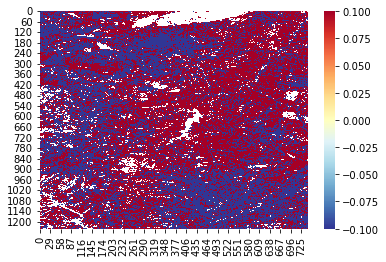

In [24]:
ax = sns.heatmap(pd_whgs_lbqgs, cmap='RdYlBu_r')


In [43]:
nan_pd_whlbq = np.isnan(pd_whgs_lbqgs)
not_nan_pd_whlbq =~ nan_pd_whlbq
pd_whlbq_2 = pd_whgs_lbqgs[not_nan_pd_whlbq]
print(pd_whlbq_2[0:11])

[ 59.08       -49.33757962 -44.08333333 -39.         -19.15662651
 -46.32       -45.         -40.01574803 -18.12727273 -41.81132075
 -31.46666667]


In [48]:
np.unique(pd_whlbq_2)[-10:-1]

array([486.33333333, 495.93939394, 497.15384615, 503.08571429,
       520.82352941, 539.63636364, 545.53333333, 559.625     ,
       580.90322581])

In [59]:
a=np.histogram(pd_whlbq_2, range=(-100,581))
a

(array([194834, 364471, 192228,  69446,  14487,   5761,   1366,    284,
            51,      6], dtype=int64),
 array([-100. ,  -31.9,   36.2,  104.3,  172.4,  240.5,  308.6,  376.7,
         444.8,  512.9,  581. ]))

In [66]:
a_hist, bin_edges = np.histogram(pd_whlbq_2, range=(-100,581), density=True)
a_hist

array([3.39409554e-03, 6.34924806e-03, 3.34869785e-03, 1.20978042e-03,
       2.52370028e-04, 1.00359200e-04, 2.37963318e-05, 4.94740720e-06,
       8.88442842e-07, 1.04522687e-07])

In [67]:
a_hist.sum()

0.014684287812041117

(array([7., 0., 2., 0., 1.]),
 array([6.00000e+00, 7.28990e+04, 1.45792e+05, 2.18685e+05, 2.91578e+05,
        3.64471e+05]),
 <BarContainer object of 5 artists>)

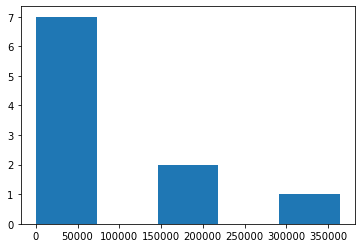

In [65]:
plt.hist(a_hist, bins='auto')

ValueError: supplied range of [-100.0, inf] is not finite

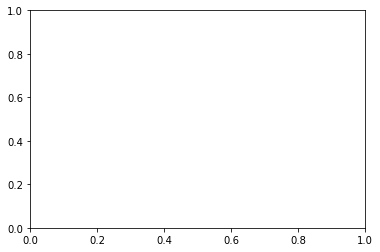

In [53]:
#a = np.hstack(pd_whlbq_2)
plt.hist(pd_whlbq_2, bins='auto')

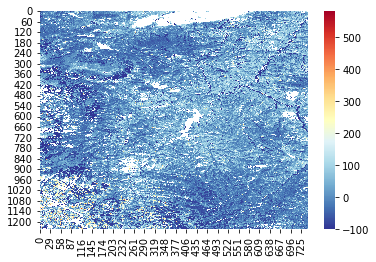

In [50]:
ax = sns.heatmap(pd_whgs_lbqgs, cmap='RdYlBu_r', vmin=-100, vmax=581)

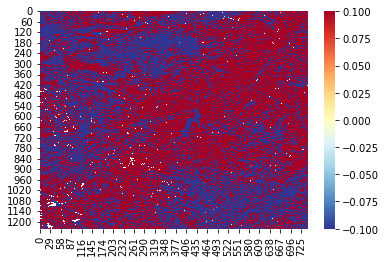

In [25]:
ax = sns.heatmap(pd_ltrgs_lbqgs, cmap='RdYlBu_r')


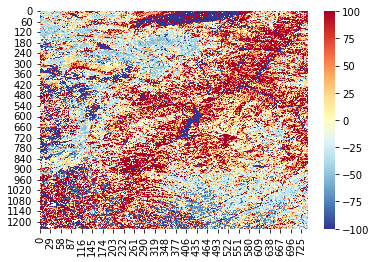

In [34]:
ax = sns.heatmap(pd_ltrgs_lbqgs, cmap='RdYlBu_r', vmin=-100, vmax=100, center=0)

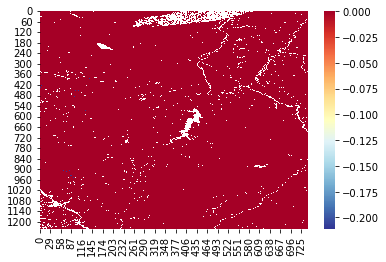

In [26]:
ax = sns.heatmap(diff_lbgs_lbqgs, cmap='RdYlBu_r')


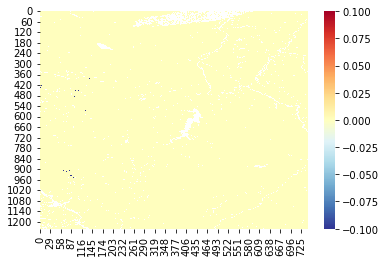

In [27]:
ax = sns.heatmap(pd_lbgs_lbqgs, cmap='RdYlBu_r', vmin=-0.1, vmax=0.1, center=0)
